# Реализация функции внесения искажений в слова (Гареева)

In [1]:
from collections import defaultdict
from typing import Set

### Функция сложности слова

In [2]:
%%capture
%run word_difficulty.ipynb

### Отбор наиболее вероятных искажений на основе цепей Маркова

Так как мы не сможем брать все искажения - для тестов это неудобно, будет отбирать несколько самых вероятных искажений там, где это необходимо на основе цепей Маркова. Наиболее вероятные искажения будем определять следующим образом: 
1. Возьмем большой список лемм - к примеру из **morph_df**.
2. Для каждой буквы каждого слова посчитаем количество разнообразных букв, идущих за ней, и разделим полученные результаты на сумму для каждого слова, чтобы получить вероятность.
3. Для слова-искажения будем брать произведение результатов для каждой буквы - вероятность искажения.
4. Будем брать слова-искажения с самым большим полученным значением.

In [3]:
letters_dict = dict()
letters = set('абвгдежзийклмнопрстуфхцчшщъыьэюя')
for word in morph_df.index:
    for i in range(len(word) - 1):
        c = word[i]
        next_c = word[i + 1]
        if c in letters and next_c in letters:
            if c not in letters_dict:
                letters_dict[c] = defaultdict(int)
            letters_dict[c][next_c] += 1
letter_df = pd.DataFrame.from_dict(letters_dict, orient='index').fillna(0)
letter_df = letter_df.div(letter_df.sum(axis=1), axis=0)
letter_df

,а,о,и,т,ц,е,с,з,л,р,...,ю,ф,б,г,ж,я,щ,й,э,ъ
к,0.301786,0.221092,0.179195,0.042423,0.006344,0.013654,0.020612,0.001988,0.045698,0.076660,...,0.000468,0.000058,0.000146,0.000146,0.000029,0.000000,0.000000,0.000000,0.000000,0.000000
л,0.108103,0.164505,0.169420,0.006500,0.000188,0.184353,0.002363,0.002202,0.018962,0.000000,...,0.024092,0.000242,0.002498,0.003089,0.002068,0.049499,0.000295,0.000000,0.000000,0.000000
и,0.010221,0.022555,0.000765,0.150221,0.024335,0.066037,0.065801,0.048516,0.030217,0.065717,...,0.000209,0.007203,0.008149,0.013739,0.004992,0.031802,0.005534,0.104333,0.000278,0.000000
б,0.120623,0.162249,0.102428,0.005760,0.002356,0.152170,0.022253,0.001833,0.083775,0.132600,...,0.004385,0.000196,0.002029,0.001833,0.005890,0.003665,0.010472,0.000000,0.000393,0.007461
н,0.090786,0.106905,0.161505,0.036039,0.005875,0.066935,0.018180,0.002163,0.000175,0.000424,...,0.001198,0.002441,0.000146,0.006460,0.001476,0.014308,0.001695,0.000000,0.000205,0.000219
у,0.009000,0.001723,0.004356,0.143609,0.002824,0.004404,0.080708,0.025610,0.064576,0.088080,...,0.009239,0.003734,0.054524,0.036573,0.035567,0.002011,0.016228,0.002872,0.001532,0.000000
д,0.098888,0.187309,0.131357,0.005929,0.005836,0.158824,0.032515,0.004169,0.014127,0.059101,...,0.002547,0.000324,0.005095,0.006299,0.005929,0.006948,0.000463,0.000000,0.000463,0.004308
о,0.002171,0.009164,0.009232,0.074691,0.004547,0.008307,0.082632,0.025171,0.080324,0.088070,...,0.000468,0.008010,0.055358,0.036871,0.015116,0.003108,0.004022,0.022703,0.001782,0.000000
т,0.067057,0.093877,0.086455,0.003430,0.000741,0.082436,0.011839,0.000370,0.006407,0.078444,...,0.002140,0.000384,0.001783,0.001715,0.000521,0.006324,0.000755,0.000000,0.000192,0.000370
а,0.000437,0.000967,0.006134,0.284202,0.016005,0.004041,0.066655,0.045006,0.072379,0.067318,...,0.004478,0.009499,0.020297,0.020390,0.015263,0.004425,0.006240,0.006293,0.001669,0.000000


In [4]:
def get_word_probability(word: str) -> int:
    probability = 1
    for i in range(len(word) - 1):
        c = word[i]
        next_c = word[i + 1]
        if c in letters and next_c in letters:
            probability *= letter_df.loc[c][next_c]
    return probability

def get_n_best_words(words, max_amount: int=1) -> List[str]:
    if max_amount < len(words):
        return sorted(list(words), key=lambda word: get_word_probability(word), reverse=True)[:max_amount]
    return list(words)

In [5]:
print(get_word_probability('собирается'))
print(get_word_probability('соберается'))
print(get_word_probability('сабирается'))
print(get_n_best_words(['собирается', 'соберается', 'сабирается'], max_amount=2))
print(get_word_probability('жизнь'))
print(get_word_probability('жызнь'))
print(get_n_best_words(['жизнь', 'жызнь'], max_amount=3))

3.5766196583760628e-12
1.3169853781758211e-11
7.512734916536771e-13
['соберается', 'собирается']
1.2936988958291801e-05
0.0
['жизнь', 'жызнь']


### Ударения

Скачаем датасет ударений для проверки безударных мест.

In [6]:
fullname = save_zip_csv(url='https://github.com/Koziev/NLP_Datasets/raw/master/Stress/all_accents.zip',
                        dirname='datasets/stress',
                        new_filename='all_accents.tsv')
stress_df = pd.read_csv(fullname, sep='\t', names=['Lemma', 'stress'])
stress_df = stress_df.drop_duplicates(subset=['Lemma'])
stress_df = stress_df.set_index('Lemma')
stress_df.head(10)

,stress
Lemma,
-де,-д^е
-ка,-к^а
-либо,-л^ибо
-нибудь,-ниб^удь
-с,-с
-таки,-так^и
-то,-т^о
­вычеркнуть,­в^ычеркнуть
а,^а


### Получение морфем слова

Многие неочевидные места в правописании слова зависят от морфемы, поэтому было бы здорово учитывать их, если это возможно.

In [7]:
def get_morphs_list(lemma: str) -> List[str]:
    if lemma not in morph_df.index:
        return []
    return list(morph_df.loc[lemma]['analysis'].split('/'))

Протестируем

In [8]:
word='недисциплинированный'
print(get_morphs_list(lemma=word))

['не', 'дисциплин', "и'р", 'ова', 'нн', 'ый']


Протестируем

### Безударные гласные

Будем заменять безударные О и Е в слове на А и И. Определять безударность с помощью списка морфем с ударениями.

In [9]:
stress_vowels_dict = {'о':'а', 'а':'о', 'е':'и', 'и':'е', 'я':'е'}

def stress_vowels_distortion(word: str, stress_word: str, morphs_list: List[str]=[]) -> Set[str]:  
    def do_distortion(word_: str, stress_word: str) -> None:
        check_word = ''
        if 0 <= stress_word.find('^') < len(stress_word) - 2:
            i = stress_word.find('^')
            check_word = stress_word[:i] + stress_word[i + 1].upper() + stress_word[i + 2:]
        else:
            return set()
        
        i = j = 2
        while (i < len(word) - 3) and (j < len(check_word) - 3):
            if word[i] != check_word[j].lower():
                if word[i] == check_word[j + 1].lower():
                    j += 1
                elif word[i + 1] == check_word[j].lower():
                    i += 1
            if check_word[j] in stress_vowels_dict and word[i] == check_word[j]:
                distortion = word_[:i] + stress_vowels_dict[word_[i]] + word_[i + 1:]
                if distortion not in distortions and distortion != word:
                    distortions.add(distortion)
                    do_distortion(distortion, stress_word)
            i += 1
            j += 1
        
    distortions = set()
    do_distortion(word, stress_word)
    return distortions

Протестируем

In [10]:
word='снеговик'
print(stress_vowels_distortion(word, stress_word=stress_df.loc[word]['stress']))
word='гриб'
print(stress_vowels_distortion(word, stress_word=stress_df.loc[word]['stress']))
print(stress_vowels_distortion('страностями', stress_word=stress_df.loc['странностями']['stress']))

{'снегавик', 'сниговик', 'снигавик'}
set()
{'странастями'}


### Парные по глухости/звонкости согласные

Заменим парные звонкие согласные в конце слова или перед глухими на их пару.

In [11]:
deaf_consonants = set('пфктшсхцчщ')
consonants_pairs = {
    'б':'п', 
    'г':'к', 
    'д':'т', 
    'ж':'ш', 
    'з':'с', 
}

def consonants_distortion(word: str, morphs_list: List[str]=[]) -> Set[str]:  
    def do_distortion(word_: str) -> None:
        for i in range(len(word_)):
            distortion = None
            c = word_[i] 
            after_c = word_[i + 1] if i < len(word_) - 1 else None
            if c in consonants_pairs and (i == len(word_) - 1 or after_c in deaf_consonants):
                distortion = word_[:i] + consonants_pairs[c] + word_[i + 1:]
                if distortion not in distortions and distortion != word:
                    distortions.add(distortion)
                    do_distortion(distortion)
        
    distortions = set()
    do_distortion(word)
    return distortions

Протестируем

In [12]:
word='дрозд'
print(consonants_distortion(word))
word='гриб'
print(consonants_distortion(word))
word='снеговик'
print(consonants_distortion(word))

{'дрозт', 'дрост'}
{'грип'}
set()


### Чередование безударных гласных в корне

Заменим корни с помощью спика морфем на их пару.

In [13]:
root_pairs = {'раст':'рост', 'ращ':'рощ', 'рос':'рас',
               'лаг':'лог', 'лож':'лаж',
               'скак':'скок', 'скоч':'скач',
               'гар':'гор', 'гор':'гар', 
               'твар':'твор','твор':'твар', 
               'клан':'клон', 'клон':'клан',
               'зар':'зор', 'зор':'зар',
               'плав':'плов', 'плов':'плав',
               'мак':'мок', 'моч':'мач',
               'равн':'ровн', 'ровн':'равн',
               'бер':'бир', 'бир':'бер',
               'дер':'дир', 'дир':'дер',
               'пер':'пир', 'пир':'пер',
               'тер':'тир', 'тир':'тер',
               'мер':'мир', 'мир':'мер',
               'жег':'жиг', 'жиг':'жег',
               'стел':'стил', 'стил':'стел',
               'блест':'блист', 'блист':'блест',
               'чет':'чит', 'чит':'чет',
               'кас':'кос', 'кос':'кас'}
    
def roots_distortion(word: str, morphs_list: List[str]=[]) -> Set[str]:
    def do_distortion(word_: str) -> None:
        index = 0
        for morph in morphs_list:
            if morph in root_pairs and morph == word_[index:index + len(morph)]:
                distortion = word_[:index] + root_pairs[morph] + word_[index + len(morph):]
                if distortion not in distortions and distortion != word:
                    distortions.add(distortion)
                    do_distortion(distortion)
            index += len(morph.replace('\'', ''))

    distortions = set()
    do_distortion(word)
    return distortions

Протестируем

In [14]:
word = 'отвориться'
print(roots_distortion(word, morphs_list=get_morphs_list(word)))
word = 'послушаться'
print(roots_distortion(word, morphs_list=get_morphs_list(word)))

{'отвариться'}
set()


### Правописание приставок

Заменим приставки с помощью спика морфем на их пару.

In [15]:
prefix_pairs = {'пре':'при', 'при':'пре',
                'без':'бес', 'бес':'без',
                'воз':'вос', 'вос':'воз',
                'вз':'вс', 'вс':'вз',
                'из':'ис', 'ис':'из',
                'низ':'нис', 'нис':'низ',
                'раз':'рас', 'рас':'раз',
                'роз':'рос', 'рос':'роз',
                'чрез':'чрес', 'чрес':'чрез'}

def prefixs_distortion(word: str, morphs_list: List[str]=[]) -> Set[str]:
    def do_distortion(word_: str) -> None:
        index = 0
        for morph in morphs_list:
            if morph in prefix_pairs and morph == word_[index:index + len(morph)]:
                distortion = word_[:index] + prefix_pairs[morph] + word_[index + len(morph):]
                if distortion not in distortions and distortion != word:
                    distortions.add(distortion)
                    do_distortion(distortion)
            index += len(morph.replace('\'', ''))
            
    distortions = set()
    do_distortion(word)
    return distortions

Протестируем

In [16]:
word = 'бесприданница'
print(prefixs_distortion(word, morphs_list=get_morphs_list(word)))
word = 'отвориться'
print(prefixs_distortion(word, morphs_list=get_morphs_list(word)))

{'беспреданница', 'безпреданница', 'безприданница'}
set()


### Гласные Ы и И после приставок

Заменим Ы на И и наоборот после приставок.

In [17]:
vowels_after_prefixs_pairs = {'и':'ы', 'ы':'и'}

all_prefixs = {'без', 'бес', 'в', 'во', 'вз', 'взо', 'вс', 'вне', 'внутри', 'воз', 'возо', 'вос', 'все', 'вы', 'до', 'за',
               'из', 'изо', 'ис', 'испод', 'к', 'кое', 'кой', 'меж', 'междо', 'между', 'на', 'над', 'надо', 'наи', 'не',
               'небез', 'небес', 'недо', 'ни', 'низ', 'низо', 'нис', 'о', 'об', 'обо', 'обез', 'обес', 'около', 'от', 'ото', 
               'па', 'пере', 'по', 'под', 'подo', 'поза', 'после', 'пра', 'пре', 'пред', 'предо', 'преди', 'при', 'про', 
               'противо', 'раз', 'разо', 'рас', 'роз', 'рос', 'с', 'со', 'сверх', 'среди', 'су', 'сыз', 'тре', 'у', 'чрез', 
               'через', 'черес', 'а', 'анти', 'архи', 'би', 'вице', 'гипер', 'де', 'дез', 'дис', 'им', 'интер', 'ир', 'квази',
               'контр', 'макро', 'кросс', 'мега', 'микро', 'мини', 'обер', 'пан', 'пост', 'пре', 'прото', 'псевдо', 'ре', 
               'суб', 'супер', 'сюр', 'транс', 'ультра', 'уни', 'экзо', 'экс', 'экстра'}

def vowels_after_prefixs_distortion(word: str, morphs_list: List[str]=[]) -> Set[str]:
    if morphs_list:
        morph = morphs_list[0].replace('\'', '')
        if len(morph) < len(word) and morph in all_prefixs and word[len(morph)] in vowels_after_prefixs_pairs:
            distortion = word[:len(morph)] +\
                        vowels_after_prefixs_pairs[word[len(morph)]] +\
                        word[len(morph) + 1:]
            if distortion != word:
                return {distortion}
    return set()

Протестируем

In [18]:
word = 'межирригационный'
print(vowels_after_prefixs_distortion(word, morphs_list=get_morphs_list(word)))
word = 'предыстория'
print(vowels_after_prefixs_distortion(word, morphs_list=get_morphs_list(word)))
word = 'христианин'
print(vowels_after_prefixs_distortion(word, morphs_list=get_morphs_list(word)))

{'межырригационный'}
{'предистория'}
set()


### Правописание ться/тся

Заменим постфикс слова ться на тся и наоборот.

In [19]:
postfix_pairs = {'тся':'ться', 'ться':'тся'}

def postfixs_distortion(word: str, morphs_list: List[str]=[]) -> Set[str]:
    for postfix in postfix_pairs:
        if word[-len(postfix):] == postfix:
            return {word[:-len(postfix)] + postfix_pairs[postfix]}
    return set()

Протестируем

In [20]:
word = 'приподняться'
print(postfixs_distortion(word))
word = 'приподнятся'
print(postfixs_distortion(word))
word = 'приподнялась'
print(postfixs_distortion(word))

{'приподнятся'}
{'приподняться'}
set()


### Двойные согласные

Удалим двойные согласные и добавим лишнюю н у суффиксов ан, ян, ын, ин.

In [21]:
vowels = set('аяоёуюыиэе')

def two_in_row_distortion(word: str, morphs_list: List[str]=[]) -> Set[str]:
    def do_distortion(word_: str) -> None:
        for i in range(len(word_)):
            if i > 0 and word_[i - 1] == word_[i] and word_[i] not in vowels:
                distortion = word_[:i] + word_[i + 1:]
                if distortion not in distortions and distortion != word:
                    distortions.add(distortion)
                    do_distortion(distortion)
            
    distortions = set()
    do_distortion(word)
    return distortions

single_suffixs = set(['ан', 'ян', 'ын', 'ин'])

def duplicate_distortion(word: str, morphs_list: List[str]) -> Set[str]:
    def do_distortion(word_: str) -> None:
        index = 0
        for morph in morphs_list:
            morph = morph.replace('\'', '')
            if morph in single_suffixs and morph == word_[index:index + len(morph)] and\
                index + len(morph) < len(word) and word_[index + len(morph) - 1] != word_[index + len(morph)]:
                    distortion = word_[:index] + morph + 'н' + word_[index + len(morph):]
                    if distortion not in distortions and distortion != word:
                        distortions.add(distortion)
                        do_distortion(distortion)
            index += len(morph)
            
    distortions = set()
    do_distortion(word)
    return distortions

Протестируем

In [22]:
word = 'беззаконный'
print(two_in_row_distortion(word))
word = 'костяной'
print(two_in_row_distortion(word))
word = 'беззаконный'
print(duplicate_distortion(word, morphs_list=get_morphs_list(word)))
word = 'костяной'
print(duplicate_distortion(word, morphs_list=get_morphs_list(word)))

{'беззаконый', 'безаконный', 'безаконый'}
set()
set()
{'костянной'}


### Непроизносимые согласные

Удалим непроизносимую букву в наборе подряд идущих согласных. Если таких не нашлось. Поробуем добавить эту лишнюю букву.

In [23]:
silent_consonants_dict = {'стн':'сн',
                          'стл':'сл',
                          'ндш':'нш',
                          'ндц':'нц',
                          'нтг':'нг',
                          'здн':'зн',
                          'здц':'зц',
                          'рдц':'рц',
                          'рдч':'рч',
                          'лнц':'нц',
                          'вств':'ств'}

def silent_consonants_distortion(word: str, morphs_list: List[str]=[]) -> Set[str]:
    def do_distortion(word_: str) -> None:
        for key, value in silent_consonants_dict.items():
            distortion = word_.replace(key, value, 1)
            if distortion not in distortions and distortion != word:
                distortions.add(distortion)
                do_distortion(distortion)
        if len(distortions) == 0:
            for key, value in silent_consonants_dict.items():
                distortion = word_.replace(value, key, 1)
                if distortion not in distortions and distortion != word:
                    distortions.add(distortion)
                    do_distortion(distortion)
    
    distortions = set()
    do_distortion(word)
    return distortions

Протестируем

In [24]:
word = 'солнце'
print(silent_consonants_distortion(word))
word = 'чувство'
print(silent_consonants_distortion(word))
word = 'ужасный'
print(silent_consonants_distortion(word))
word = 'стнстл'
print(silent_consonants_distortion(word))
word = 'костяной'
print(silent_consonants_distortion(word))

{'сонце'}
{'чуство'}
{'ужастный'}
{'стнсл', 'снстл', 'снсл'}
set()


### Твердый знак

Заменим твердый знак на мягкий.

In [25]:
def hard_sign_distortion(word: str, morphs_list: List[str]=[]) -> Set[str]:
    if 'ъ' in set(word):
        return {word.replace('ъ', 'ь', 1)}
    return set()

Протестируем

In [26]:
word = 'объём'
print(hard_sign_distortion(word))
word = 'солнце'
print(hard_sign_distortion(word))

{'обьём'}
set()


### Дефисные написания

Уберем дефисы или заменим на пробел.

In [27]:
def hyphen_distortion(word: str, morphs_list: List[str]=[]) -> Set[str]:
    if '-' in set(word):
        return {word.replace('-', ' '), word.replace('-', '')}
    return set()

Протестируем

In [28]:
word = 'всё-таки'
print(hyphen_distortion(word))
word = 'объём'
print(hyphen_distortion(word))

{'всётаки', 'всё таки'}
set()


### Финальная функция внесения искажений в слова

Скомбинируем все созданные искажения, начиная с более узких правил, которые зависят от морфем, потом используя правила, которые изменяют количество символов в слове  самыми простыми заменами согласных и гласных. Ограничим количество полученных вариантов слова (слово + искажения) переменной **max_amount** и минимальное количество переменной **min_amount**.

In [29]:
def create_distortions(word: str, lemma: str, min_amount: int=3, max_amount: int=6) -> List[str]:
    morphs_list=get_morphs_list(lemma)    
    distortions = set([word])
    
    def do_function(func, stress: bool=False) -> None:
        result = set()
        amount = (max_amount // len(distortions)) - 1
        for distortion in distortions:
            created_distortions = set()
            if stress:
                if word in stress_df.index:
                    stress_word = stress_df.loc[word]['stress']
                    created_distortions = func(distortion, stress_word, morphs_list)
            else:
                created_distortions = func(distortion, morphs_list)
            new_distortions = created_distortions - distortions - result
            result.update(get_n_best_words(new_distortions, max_amount=amount))
        distortions.update(result)     

    do_function(roots_distortion)
    do_function(prefixs_distortion)
    do_function(vowels_after_prefixs_distortion)
    do_function(postfixs_distortion)
    do_function(consonants_distortion)
    do_function(hard_sign_distortion)
    do_function(two_in_row_distortion)
    do_function(duplicate_distortion)
    do_function(silent_consonants_distortion)
    do_function(hyphen_distortion)
    do_function(stress_vowels_distortion, True)
    
    if len(distortions) < min_amount:
        return []
    distortions.remove(word)
    return list(distortions)

Протестируем

In [30]:
print(create_distortions(word='написанные', lemma='написанный'))
print(create_distortions(word='бессмысленное', lemma='бессмысленный'))
print(create_distortions(word='собирается', lemma='собираться'))
print(create_distortions(word='престаринного', lemma='престаринный'))
print(create_distortions(word='победа', lemma='победа'))

['написонные', 'написаные', 'написоные']
['безсмысленое', 'безсмысленное', 'бесмысленое', 'бесмысленное']
['соберается', 'собераеться', 'собираеться']
[]
[]


### Проверка работы функции

Напишем функции для создания датасета слов повышенной сложности с искажениями из текстового документа со словами и визуализации количества полученных искажений.

In [31]:
def countplot_distortions_df(distortions_df: pd.DataFrame) -> None:
    print('Всего слов: {}'.format(len(distortions_df)))
    print('Слов без искажений: {}'.format(len(distortions_df[distortions_df['distortions_amount'] == 0])))
    print('Слов с искажениями: {}'.format(len(distortions_df[distortions_df['distortions_amount'] != 0])))
    
    plt.rc('font', size=13)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    
    sns.countplot(x=distortions_df[distortions_df['distortions_amount'] != 0]['distortions_amount'])
    ax.set_title('Количество слов с определенном количеством искажений')
    ax.set_ylabel('Количество слов')
    ax.set_xlabel('Количество искажений')
    
    plt.show()
    
def analyze_distortions(filepath: str, stop=None, show_plot=True) -> pd.DataFrame:
    distortions_df = pd.DataFrame(columns=['distortions', 'distortions_amount'])
    with open(filepath, 'rb') as f:
        for i, word in enumerate(tqdm(f.read().decode('utf-8').split())):
            word = transform_word(word)[0]
            if word and word not in distortions_df.index and word.find('-') < 0:
                difficulty = word_difficulty(word)
                if 0.5 <= difficulty['difficulty']:
                    distortions = create_distortions(word, difficulty['lemma'])
                    info = {'distortions': distortions,
                            'distortions_amount': len(distortions),
                            'difficulty': difficulty['difficulty']}
                    row = pd.Series(info, name=word)
                    distortions_df = distortions_df.append(row)
            if stop and stop <= i:
                break
    if show_plot:
        countplot_distortions_df(distortions_df)
    return distortions_df

Возьмем небольшой текст, чтобы мы могли протестировать внесение искажений. Например, отрывок из 'Алисы в стране чудес' Льюиса Кэрролла.

In [32]:
# alice_in_wonderland_fullname = save_zip_txt(url='https://royallib.com/get/txt/keroll_lyuis/alisa_v_strane_chudes.zip',
#                                      dirname='datasets/texts/alice_in_wonderland/',
#                                      new_filename='alice_in_wonderland.txt')

100%|███████████████████████████████████████████████████████████████████████████| 28613/28613 [00:48<00:00, 585.33it/s]


Всего слов: 1397
Слов без искажений: 647
Слов с искажениями: 750


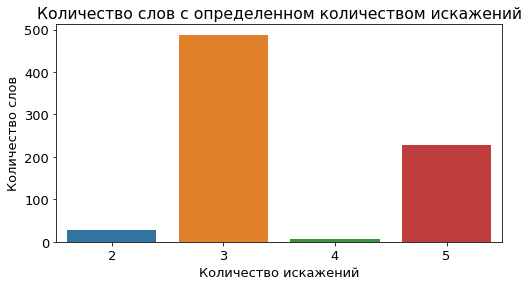

,distortions,distortions_amount,difficulty
word,,,
проникновенным,"[пранекновенным, праникновенным, праникновеным...",5,0.894737
подчеркивают,"[подчеркевают, потчеркевают, потчеркивают, пот...",5,0.900000
многообещающе,"[мнагообищающе, многоабещающе, многаобещающе, ...",5,0.901142
несообразности,"[несообразднасти, несообраздности, несоабразно...",5,0.933333
убежденностью,"[убижденостью, убежденостью, убежденастью, убе...",5,0.950000
неодобрительно,"[неодобритильно, неодабрительно, неодабритильн...",5,0.954335
непревзойденным,"[непривзайденым, непривзайденным, непривзойден...",5,1.000000
постепенностью,"[постипенностью, постепеностью, постепеннастью...",5,1.000000
противоречащее,"[пратеворечащее, пративаречащее, пративоречаще...",5,1.000000


In [33]:
# distortions_df = analyze_distortions(filepath=alice_in_wonderland_fullname, stop=None)
# distortions_df.rename_axis('word').sort_values(by=['distortions_amount', 'difficulty', 'word']).tail(10)